In [1]:
# example.ipynb
# Authors: Stephan Meighen-Berger
# Shows the capabilities of the package. This uses the sim method, generating
# results for multiple combinations

In [2]:
# Import generic stuff
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
# Font style
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)

In [4]:
# Import package
# Adding path to module
sys.path.append("../")
# Module imports
# TODO: Fix this
from fennel.fennel import Fennel
from fennel.config import config
# picture path
PICS = '../pics/'

In [5]:
# Plotting standards
std_size = 6.  # Size of the plot
fontsize = 20.  # Fontsize in the plot
lw=1.  # Linewidth
h_length=1  # Handle length for the legends
export_dpi = 500  # Dpi for the image export

In [6]:
# Creating a fennel object
fennel_instance = Fennel()

In [7]:
# Running the simulation
fennel_instance.sim()
statistics = fennel_instance.statistics

c:\Users\steph\OneDrive\Documents\GitHub\fennel\notebooks\..\fennel\hadron_cascades.py:105: RuntimeWarning: divide by zero encountered in power
  em_fraction_sd = sigma0 * np.log(E)**(-gamma)
c:\Users\steph\OneDrive\Documents\GitHub\fennel\notebooks\..\fennel\hadron_cascades.py:242: RuntimeWarning: divide by zero encountered in power
  c = c_pars[0] * (np.log(E))**c_pars[1]
c:\Users\steph\OneDrive\Documents\GitHub\fennel\notebooks\..\fennel\hadron_cascades.py:243: RuntimeWarning: divide by zero encountered in power
  d = d_pars[0] * (np.log(E))**d_pars[1]
c:\Users\steph\OneDrive\Documents\GitHub\fennel\notebooks\..\fennel\hadron_cascades.py:203: RuntimeWarning: invalid value encountered in multiply
  (a * np.exp(b * np.abs(


In [29]:
# Energies of interest
energy_ids = [0, 10, 20, 30, 40]
egrid = config['advanced']["energy grid"]
track_lengths = config['advanced']['track lengths']
track_ids = [30]
wavelengths = config['advanced']['wavelengths']
angle_grid = config['advanced']['angles']
zgrid = config['advanced']['z grid']

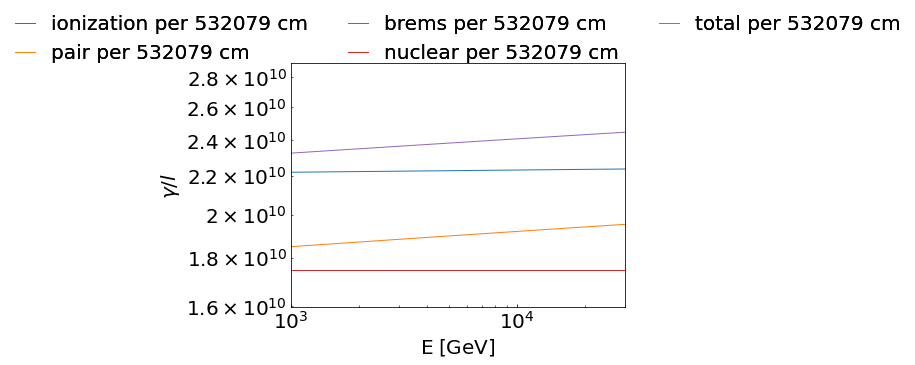

In [27]:
# Photon Counts
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
for interaction in config["simulation"]["track interactions"]:
    interaction_res = statistics[13]['track'][interaction]['light yields']
    # Calculating the total yields
    # Only fetching the entries with the track ids of interest
    for track_id in track_ids:
        total_yields = np.trapz(interaction_res[track_id], x=wavelengths, axis=0)
        ax1.plot(egrid, total_yields, label=interaction + ' per %.f cm' % track_lengths[track_id], lw=lw)
# ---------------------------------------------
# Plotting options
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\mathrm{E}\;[\mathrm{GeV}]$', fontsize=fontsize)
ax1.set_ylabel(r'$\gamma/l$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_xlim(1e3, 3e4)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Counts_per_Tracklength.png",
               bbox_inches='tight', dpi=export_dpi)

C:\Users\steph\AppData\Local\Temp/ipykernel_21604/2126134091.py:7: RuntimeWarning: invalid value encountered in true_divide
  flipped_res.T[e_id] /


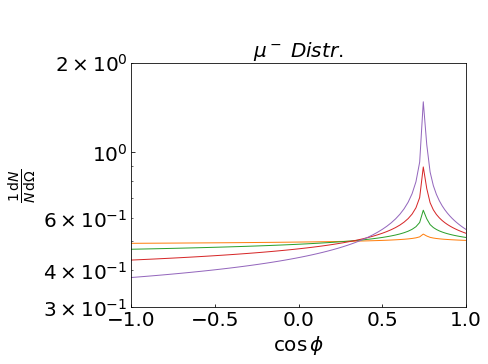

In [47]:
# Additional tracks -- angular distro
angle_distro = statistics[13]['track']['emission angles']
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
flipped_res = angle_distro[::-1]
for e_id in energy_ids:
    ax1.plot(np.cos(np.deg2rad(angle_grid[::-1])),
    flipped_res.T[e_id] /
    np.trapz(flipped_res.T[e_id], x=np.cos(np.deg2rad(angle_grid[::-1]))), lw=lw)
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\cos\phi}$', fontsize=fontsize)
ax1.set_ylabel(r'$\frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}\Omega}$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_xlim(-1, 1)
ax1.set_ylim(3e-1, 2e0)
ax1.set_title("$\mu^-\;Distr.$", fontsize=fontsize)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Angle_Distro_Track.png",
               bbox_inches='tight', dpi=export_dpi)

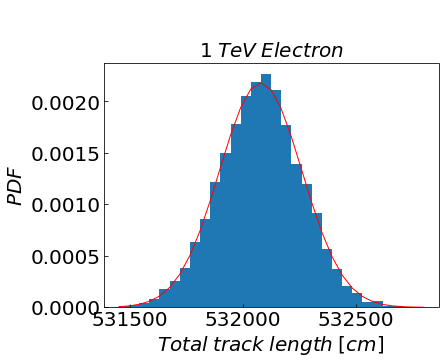

In [25]:
# EM Cascade -- Track lengths
track_lengths = statistics[11]['em cascade']['length']
track_lengths_sd = statistics[11]['em cascade']['length sd']
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
for e_id in [30]:
    s = np.random.normal(track_lengths[e_id], track_lengths_sd[e_id], 10000)
    count, bins, ignored = ax1.hist(s, 30, density=True)
    ax1.plot(bins, 1/(track_lengths_sd[e_id] * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - track_lengths[e_id])**2 / (2 * track_lengths_sd[e_id]**2) ),
            linewidth=lw, color='r')
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$Total\;track\;length\;[cm]$', fontsize=fontsize)
ax1.set_ylabel(r'$PDF$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_title("$1\;TeV\;Electron$", fontsize=fontsize)
# ax1.set_xlim(500, 600)
# ax1.set_ylim(1e-3, 1e2)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "EM_Tracks_Distro.png",
               bbox_inches='tight', dpi=export_dpi)

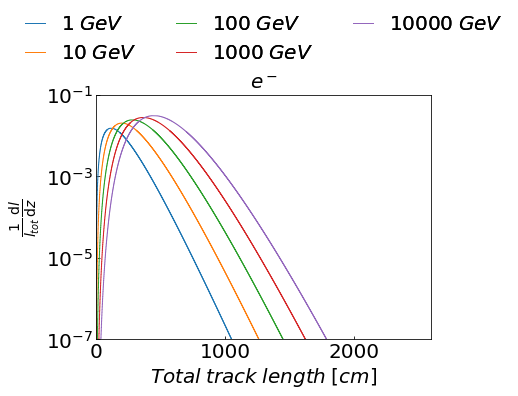

In [31]:
# EM Cascade -- Longi Profile
longi_profile = statistics[11]['em cascade']['long profile']
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
for e_id in energy_ids:
    ax1.step(zgrid,
    longi_profile.T[e_id] / fennel_instance._em_cascade._Lrad,
    linewidth=lw, label="$%.f\;GeV$" % egrid[e_id])
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlabel(r'$Total\;track\;length\;[cm]$', fontsize=fontsize)
ax1.set_ylabel(r'$\frac{1}{l_{tot}}\frac{\mathrm{d}l}{\mathrm{d}z}$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.4),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_xlim(0, 2600)
ax1.set_ylim(1e-7, 1e-1)
ax1.set_title("$e^-$", fontsize=fontsize)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "EM_Longi_Profile.png",
               bbox_inches='tight', dpi=export_dpi)

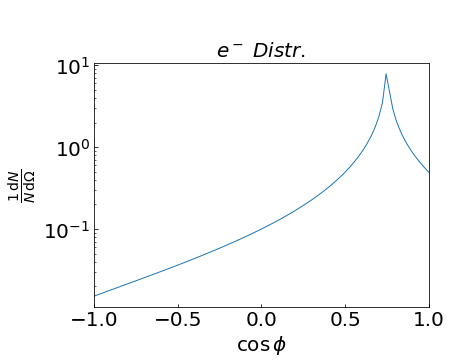

In [38]:
# EM Cascade -- Angular Distro
angle_distro = statistics[11]['em cascade']['emission angles']
flipped_res = angle_distro[::-1]
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
ax1.plot(np.cos(np.deg2rad(angle_grid[::-1])), flipped_res / np.trapz(flipped_res, x=np.cos(np.deg2rad(angle_grid[::-1]))), lw=lw)
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\cos\phi}$', fontsize=fontsize)
ax1.set_ylabel(r'$\frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}\Omega}$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_xlim(-1, 1)
# ax1.set_ylim(1e-3, 1e2)
ax1.set_title("$e^-\;Distr.$", fontsize=fontsize)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "EM_Cascade_Angles.png",
               bbox_inches='tight', dpi=export_dpi)

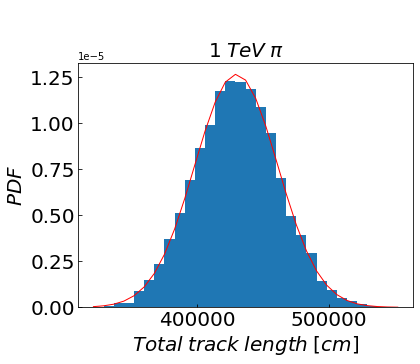

In [40]:
# Hadron Cascade -- Track lengths
track_lengths = statistics[211]['hadron cascade']['length']
track_lengths_sd = statistics[211]['hadron cascade']['length sd']
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
for e_id in [30]:
    s = np.random.normal(track_lengths[e_id], track_lengths_sd[e_id], 10000)
    count, bins, ignored = ax1.hist(s, 30, density=True)
    ax1.plot(bins, 1/(track_lengths_sd[e_id] * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - track_lengths[e_id])**2 / (2 * track_lengths_sd[e_id]**2) ),
            linewidth=lw, color='r')
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$Total\;track\;length\;[cm]$', fontsize=fontsize)
ax1.set_ylabel(r'$PDF$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_title("$1\;TeV\;\pi$", fontsize=fontsize)
# ax1.set_xlim(500, 600)
# ax1.set_ylim(1e-3, 1e2)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Hadron_Tracks_Distro.png",
               bbox_inches='tight', dpi=export_dpi)

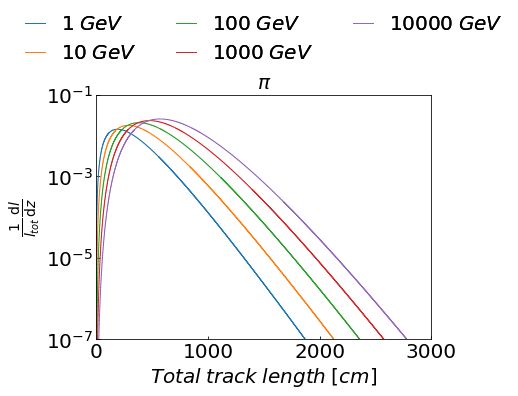

In [42]:
# Hadron Cascade -- Longi Profile
longi_profile = statistics[211]['hadron cascade']['long profile']
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
for e_id in energy_ids:
    ax1.step(zgrid,
    longi_profile.T[e_id] / fennel_instance._em_cascade._Lrad,
    linewidth=lw, label="$%.f\;GeV$" % egrid[e_id])
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlabel(r'$Total\;track\;length\;[cm]$', fontsize=fontsize)
ax1.set_ylabel(r'$\frac{1}{l_{tot}}\frac{\mathrm{d}l}{\mathrm{d}z}$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.4),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_xlim(0, 3000)
ax1.set_ylim(1e-7, 1e-1)
ax1.set_title("$\pi$", fontsize=fontsize)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Hadron_Longi_Profile.png",
               bbox_inches='tight', dpi=export_dpi)

C:\Users\steph\Anaconda3\envs\fennel\lib\site-packages\numpy\lib\function_base.py:4234: RuntimeWarning: overflow encountered in add
  ret = (d * (y[tuple(slice1)] + y[tuple(slice2)]) / 2.0).sum(axis)


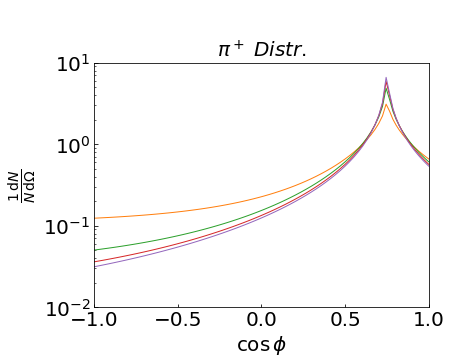

In [43]:
# Additional tracks -- angular distro
angle_distro = statistics[211]['hadron cascade']['emission angles']
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
flipped_res = angle_distro[::-1]
for e_id in energy_ids:
    ax1.plot(np.cos(np.deg2rad(angle_grid[::-1])),
    flipped_res.T[e_id] /
    np.trapz(flipped_res.T[e_id], x=np.cos(np.deg2rad(angle_grid[::-1]))), lw=lw)
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\cos\phi}$', fontsize=fontsize)
ax1.set_ylabel(r'$\frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}\Omega}$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_xlim(-1, 1)
ax1.set_ylim(1e-2, 1e1)
ax1.set_title("$\pi^+\;Distr.$", fontsize=fontsize)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Hadron_Cascade_Angle.png",
               bbox_inches='tight', dpi=export_dpi)